## Nosso problema

1 - O que você entendeu do dataset? Explique como se eu tivesse 5 anos de idade.<br>
2 - Catalogar as informações e classificar os dados quanto ao tipo pode consultar a fonte
(https://archive.ics.uci.edu/ml/datasets/Heart+Disease) <br>
3 - É preciso tratar/normalizar algum deles? Justifique sua resposta.<br>
4 - Tente ordenar as features por relevância. Justifique sua resposta.<br>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.

## Sobre os Dados

Este banco de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. Em particular, o banco de dados de Cleveland é o único que tem sido usado por pesquisadores de ML para
esta data. O campo "alvo" refere-se à presença de doença cardíaca no paciente. É um número inteiro com valor ***0 = nenhuma / menos chance de ataque cardíaco*** e ***1 = mais chance de ataque cardíaco***

O conjunto principal de dados usado neste projeto encontra-se disponível neste [link](https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.
<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>




### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test* é um exame de imagem nuclear que mostra como o sangue flui para o coração enquanto você se exercita ou em repouso. O *Thalium* é um elemento químico radioativo.
  * 0: normal
  * 1: defeito fixo
  * 2: defeito reversível
* `target` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)
  

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [39]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
# url dos datasets
dataset = "/content/heart.csv"

# importar dataset da UCI
df = pd.read_csv(dataset, delimiter=';')

### Verificando os dados importados


In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# Valores da variável alvo
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Olhando acima as informações sobre os atributos da ***Cleveland Clinic Foundation*** , nosso atributo `thal` - *thallium stress test* que é um exame de imagem nuclear que mostra como o sangue flui a ou em repouso. Possui os seguintes valores:
  * 0: normal
  * 1: defeito fixo
  * 2: defeito reversível
  
Para efeito de análise vamos considerar apenas duas situações:

* **0** - Normal
* **1** - Defeito

Então, iremos igualar a **0** os valores iguais a 0 e **1** para os valores 2 ou 3.

In [43]:
# Quantidades antes da atualização
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [44]:
# converter valores 1 para 0
df.loc[df.thal == 1, 'thal'] = 0

# converter valores 2 ou 3 para 1
df.loc[df.thal == 2, 'thal'] = 1
df.loc[df.thal == 3, 'thal'] = 1


In [45]:
# Quantidades apos atualização
df.thal.value_counts()

1    283
0     20
Name: thal, dtype: int64

## Iniciando nossa análise exploratória

* Ver o tamanho do df (shape)
* Ver a descrição estatística do df (describe)
* Ver os tipos das variáveis do df (dtypes)
* Ver as 5 primeiras entradas do df (head)
* Contar quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no *dataset* (value_counts)
* Ver valores ausentes do df (isnull().sum())
* Plotar o gráfico de linha para df_brasil
* Plotar o gráfico de barras para ver a quantidade de homens e mulheres em df
* Plotar o gráfico de dispersão para as variáveis `age` e `chol`
* plotar um histograma para o colesterol sérico
* plotar um gráfico de pizza para `restecg`
* Plotar um *heatmap* com as correlações
* Qualquer outra análise que você quiser.


###  Vamos ver o tamanho do nosso conjunto de dados (dataset)

In [46]:
print('Ocorrências. Numero de casos avaliados :', df.shape[0])
print('Características avaliadas : ', df.shape[1])

Ocorrências. Numero de casos avaliados : 303
Características avaliadas :  14


### Vamos ver como estão distribuídos os nossos dados
* A média da idade dos pacientes é de 54 anos
* Temos 96 mulheres e 207 homens
* E do total de indivíduos 165 não apresentaram doenças cardiovasculares contra 138 que apresentaram.

In [47]:
# Distribuição Geral
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.933993,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.248704,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000


In [48]:
# Quantidade por sexo
# 0 - Mulher
# 1 - Homen
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [49]:
# Quantidade de ocorrencias 
# 0 Não apresenta doença - 138
# 1 Apresenta doença - 165

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [50]:
# Verificando a ocorrencia da presença da doenca por sexo
# Mulheres
# 72 Não apresentaram a doença
# 24 Apresentaram a doença

# Homens
# 93 Não apresentaram a doença
# 114 Apresentaram doença

df.groupby(['sex','target']).count()

age   cp  trestbps  chol  fbs  ...  exang  oldpeak  slope   ca  thal
sex target                                 ...                                  
0   0        24   24        24    24   24  ...     24       24     24   24    24
    1        72   72        72    72   72  ...     72       72     72   72    72
1   0       114  114       114   114  114  ...    114      114    114  114   114
    1        93   93        93    93   93  ...     93       93     93   93    93

[4 rows x 12 columns]

### Vamos identificar o tipo das variáveis

In [51]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Exibindo as primeiras linhas do nosso conjunto de dados

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,1


### Para nossa análise precisamos verificar se todos os valores estão preenchidos

In [53]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Todos os nossos valores estão preenchidos.

### Vamos gerar um gráfico de barras para ver a quantidade de homens e mulheres

#### Substituindo os valores do sexo para texto
* 0 - Feminino
* 1 - Masculino

In [54]:
# copiando o dataset para outro
df_sexo = df.copy()

# converter 0 para Feminino
df_sexo.loc[df_sexo.sex == 0 , 'sex'] = 'Feminino'

# converter 1 para Masculino
df_sexo.loc[df_sexo.sex == 1 , 'sex'] = 'Masculino'


In [55]:
import seaborn as sbr

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


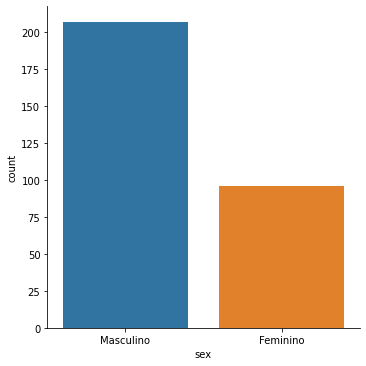

In [56]:
# Com Seaborn
sbr.factorplot('sex', data=df_sexo, kind='count');

In [57]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

###  Plotar o gráfico de dispersão para as variáveis `age` e `chol`

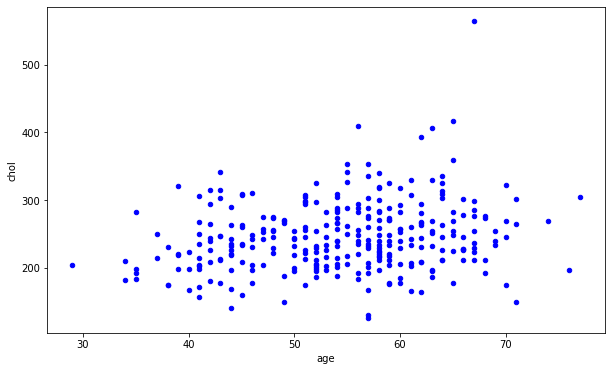

In [58]:
fig, ax=plt.subplots(figsize=(10,6))

df.plot.scatter(c='blue', x='age', y='chol', ax=ax);

### Com uma reta para representar a regressão linear

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


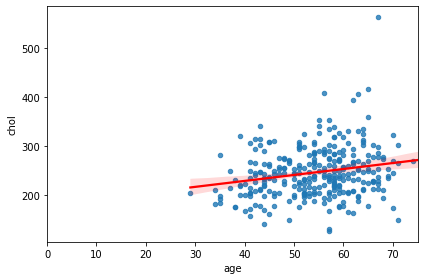

In [59]:
# importar o seaborn
import seaborn as sns

# plotar scatter plot e regressão linear
fig, ax = plt.subplots()

ax.set_xlim(right=75)

sns.regplot(df['age'],df['chol'], scatter_kws={"s":20},
            line_kws={"color": "red"}, data=df, ax=ax)

plt.tight_layout();


* Podemos observar uma leve tendência no aumento do colesterol à medida que a idade aumenta

### Gráfico de mapa de calor *heatmap* com as correlações

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,1


,cp,restecg,thal,exang,restecg,oldpeak,ca,target
cp,1.000000,0.044421,0.068888,-0.394280,0.044421,-0.149230,-0.181053,0.433798
restecg,0.044421,1.000000,0.014205,-0.070733,1.000000,-0.058770,-0.072042,0.137230
thal,0.068888,0.014205,1.000000,-0.069868,0.014205,-0.087240,-0.044430,0.103854
exang,-0.394280,-0.070733,-0.069868,1.000000,-0.070733,0.288223,0.115739,-0.436757
restecg,0.044421,1.000000,0.014205,-0.070733,1.000000,-0.058770,-0.072042,0.137230
oldpeak,-0.149230,-0.058770,-0.087240,0.288223,-0.058770,1.000000,0.222682,-0.430696
ca,-0.181053,-0.072042,-0.044430,0.115739,-0.072042,0.222682,1.000000,-0.391724
target,0.433798,0.137230,0.103854,-0.436757,0.137230,-0.430696,-0.391724,1.000000


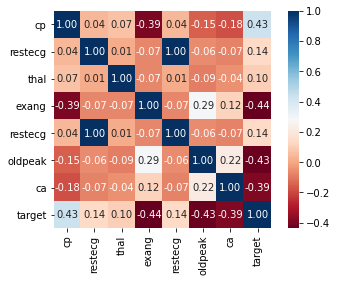

In [61]:
# Importando pacotes necessarios para plotar um gráfico do tipo heatmap (mapa de calor)
# Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlibexang	
import seaborn as sbs 

df_heatmap = df.copy()

# criar uma matriz de correlação dos atributos que mais influenciam na indicação de doença ou não
corr = df_heatmap[['cp', 'restecg','thal','exang','restecg','oldpeak','ca','target']].corr()

# mostrar a matriz de correlação
display(corr)

# plotar um heatmap a partir das correlações
sbs.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# Alguns insights

## Analisamos o conjunto de dados (dataset).

* Conjunto de dados relacionados às doenças cardiovasculares. 
* Foram apresentadas 303 ocorrências com 14 atributos
* A média da idade dos pacientes é de 54 anos
* Temos 96 mulheres e 207 homens
* Do total de 303 ocorrências, 165 não apresentaram doenças cardiovasculares contra 138 que apresentaram.

### Por Sexo
- Mulheres
 * 72 Não apresentaram a doença
 * 24 Apresentaram a doença

- Homens
 * 93 Não apresentaram a doença
 * 114 Apresentaram doença

 Podemos gráfico de `Dispersão` podemos concluir que existe uma uma leve tendência no aumento do colesterol à medida que a idade aumenta
 
 Analisando o Mapa de Calor `heatmap`, conseguimos identificar uma correlação entre:
 
 * `cp` - tipo da dor torácica
 * `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
 * `ca` - número de vasos principais colorido por fluoroscopia
 * `exang` - angina induzida pelo exercício
 


### Normalizando alguns dados

Para melhorar o desempenho do modelo, vamos normalizar as variáveis numéricas usando `StandardScaler`.
Vamos normalizar algumas colunas para manter a mesma escala entre elas. Aplicamos a normalização nas colunas `trestbps`, `chol` e `thalach`.

In [62]:
# importando a biblioteca para normalizar nossos dados
from sklearn.preprocessing import StandardScaler

In [63]:
# fazendo uma copia do nosso dataset já limpo
scaled_df = df.copy()

In [64]:
# selecionando as colunas para normalizar
num_cols = scaled_df.drop(labels=['sex', 'fbs','restecg','exang', 'oldpeak', 'slope', 'ca','thal', 'target' ] ,
                         axis=1).select_dtypes(exclude='object').columns

In [65]:
# normalizando as colunas numéricas
scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

In [66]:
# verificando nossos dados
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,1.973123,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,0,1
1,-1.915313,1,1.002577,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,1,1
2,-1.474158,0,0.032031,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,1,1
3,0.180175,1,0.032031,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,1,1
4,0.290464,0,-0.938515,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,1,1


### Preparando nossos dados

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# metricas
from sklearn.metrics import accuracy_score

In [69]:
X = scaled_df.drop('target', axis = 1)
y = scaled_df['target']

In [70]:
# dividindo o dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Random Forest


In [71]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [72]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

print('Acuracia: {:.2f} % '.format(metrics.accuracy_score(y_test, y_pred)*100)) 

Acuracia: 85.53 % 


## Importancia das features

In [73]:
#Importando nosso modelo
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
df.feature_names = X.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [75]:
df.feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [76]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=df.feature_names).sort_values(ascending=False)
feature_imp

ca          0.143590
oldpeak     0.133046
cp          0.124153
thalach     0.110871
age         0.096669
chol        0.089185
trestbps    0.083524
exang       0.081618
slope       0.054226
sex         0.045224
restecg     0.021196
fbs         0.009735
thal        0.006963
dtype: float64

### As features mais importantes são `ca`, `cp`, `oldpeak`, `thalach` e `age`.